# Quantization of light and its consequences

### Blackbody radiation, line spectra, and the photoelectric effect

By the middle of the 1800s, Newton's theory of light "corpuscles" was considered obsolete. There was ample evidence from experiments with diffraction gratings and slits (which we will explore in Chapter 5) that light was a wave phenomenon. But Planck's derivation of the blackbody function seemed to require quantization, and the photoelectric effect could not be explained by wave physics. Line spectra also provided evidence for quantization of both light and electron motion, which we will explore further in Chapter 4.

#### Planck and blackbodies

<tt>blackbody_demo.ipynb</tt> has graphs illustrating the "ultraviolet catastrophe" that came from extrapolating the Rayleigh-Jeans law to short wavelengths / high frequencies. Spoiler alert: the Rayleigh-Jeans law, which was the experimentally determined function describing blackbody flux density as a function of temperature and wavelength / frequency, predicts that the flux density (power per (unit wavelength or frequency) per unit area) goes to infinity as the wavelength decreases. It also has graphs illustrating the true blackbody radiation law, which is still applied in astrophysics today.

<bf>Planck's journey:</bf>
<ul>
    <li>By trial and error, he found a formula that reproduced the true spectrum emitted by a blackbody across all wavelengths.</li>
    <li>Planck then searched for a theoretical underpinning to his formula. His model was that a blackbody consists of "oscillators" (recall that light is made of oscillating electric and magnetic fields), and each individual oscillator contributes an amount of energy that's an integer multiple of $h\nu$ (where $\nu$ is the frequency of the light and $h$ is a constant).</li>
    <li>He expected to take the limit as $h \rightarrow 0$ (following a statistical mechanics technique of Boltzmann), but found that he could only recover the blackbody formula for finite $h$. That means there's some minimum level or "quantum" of oscillator energy at each frequency, and it's not possible for an oscillator to emit less than one quantum.</li>
</ul>

<bf>Quantization solves the ultraviolet catastrophe</bf> because if the temperature of a blackbody is too low, it doesn't have enough energy to emit a quantum of high-frequency light, hence the precipitous dropoff in flux toward low frequency.

#### [Online blackbody demo with open-source software on GitHub](https://github.com/phetsims/blackbody-spectrum/blob/main/README.md)

The link that says "Click here to run 'Blackbody Spectrum'" will take you to an interactive demo with a temperature slider.

#### Two more pieces of blackbody math

Wien's displacement law - we use this to find the temperature of a blackbody based on measurements of its spectrum.

### $\lambda_{\rm max} = \frac{2.898 \times 10^{-3} {\rm m \cdot K}}{T}$

where $\lambda_{\rm max}$ is the wavelength of maximum flux (note: in astronomy, "intensity" usually has units W / m$^2$ / Hz / sr, so I use the term "flux" for Planck's equation even though the cursive I stands for intensity).

Total power emitted by a blackbody:

### $R(T) = \sigma T^4$,

where $\sigma = 5.6705 \times 10^{-8}$ W / m$^2$ / K$^4$. For a "greybody", which behaves mostly like a blackbody but is not quite a perfect absorber or emitter, we add an efficiency factor or <em>emissivity</em> $\epsilon$:

### $R(T) = \epsilon \sigma T^4$.

For space dust, $0.5 \lesssim \epsilon \lesssim 1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from IPython.display import Image, display

# Make readable plots
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

In [2]:
# Planck blackbody function
def blackbody(lam, T):
    return (2*np.pi * constants.h * constants.c**2) / \
           ((np.exp(constants.h * constants.c / (lam * constants.k * T))-1) * lam**5)

# Wien's displacement law
lammax = lambda T: constants.Wien / T

In [3]:
micron_to_meter = 1e-6

# Array of wavelengths from far-ultraviolet to far-infrared
lams = np.logspace(-1.5, 2.5, num=301, endpoint=True) * micron_to_meter

# Temperatures of blackbodies we will plot
temps = np.array([40, 400, 4000, 40000])

# Peak wavelengths of those blackbodies
peak_lams = lammax(temps)

<ipython-input-2-9637379736c2>:4: RuntimeWarning: overflow encountered in exp
  ((np.exp(constants.h * constants.c / (lam * constants.k * T))-1) * lam**5)
<ipython-input-2-9637379736c2>:4: RuntimeWarning: overflow encountered in exp
  ((np.exp(constants.h * constants.c / (lam * constants.k * T))-1) * lam**5)


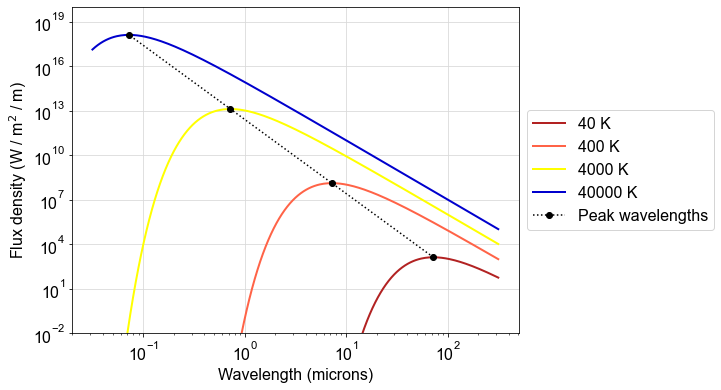

In [4]:
colors = ['firebrick', 'tomato', 'yellow', 'mediumblue']

plt.figure(figsize=(8,6))
for i in range(len(temps)):
    plt.loglog(lams / micron_to_meter, blackbody(lams, temps[i]), color=colors[i], lw=2, 
               label=f"{temps[i]}"+" K")
plt.plot(peak_lams / micron_to_meter, blackbody(peak_lams, temps), color='k', ls=':',
         marker='o', label='Peak wavelengths')
plt.ylim([1e-2, 1e20])
plt.xlabel("Wavelength (microns)")
plt.ylabel(r"Flux density (W / m$^2$ / m)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(color='0.85')

### Line spectra

In the 1800s, physicists knew how to use diffraction gratings and prisms (or a combination of the two called a <em>grism</em>) to spread out the constituent wavelengths of a beam of light. They also knew how to "excite" gas molecules in discharge tubes by putting a high voltage across the tube. They knew that different gases created different wavelength patterns. Here are some examples:

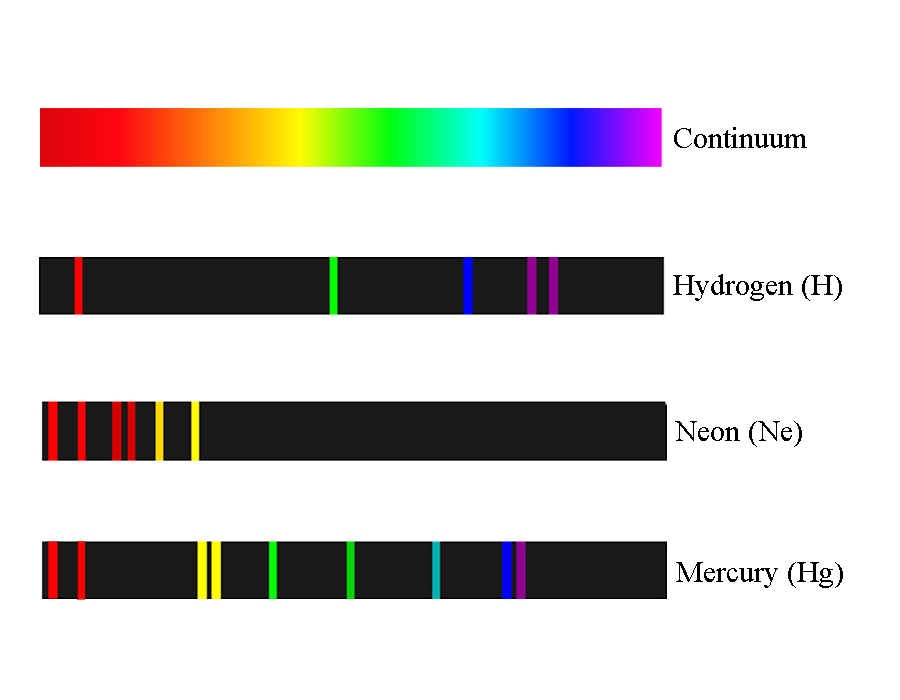

In [5]:
display(Image(filename='line_spectra.jpeg'))

The line spectra above are <em>emission spectra</em>, which is what you get from hot, excited gas against a cool background. The background produces very little light, while the "lines" from the gas are bright.

Below is a comparison of a continuum, emission, and <em>absorption spectrum</em>, in which a cool layer of hydrogen gas is between the observer and a source of continuum light.

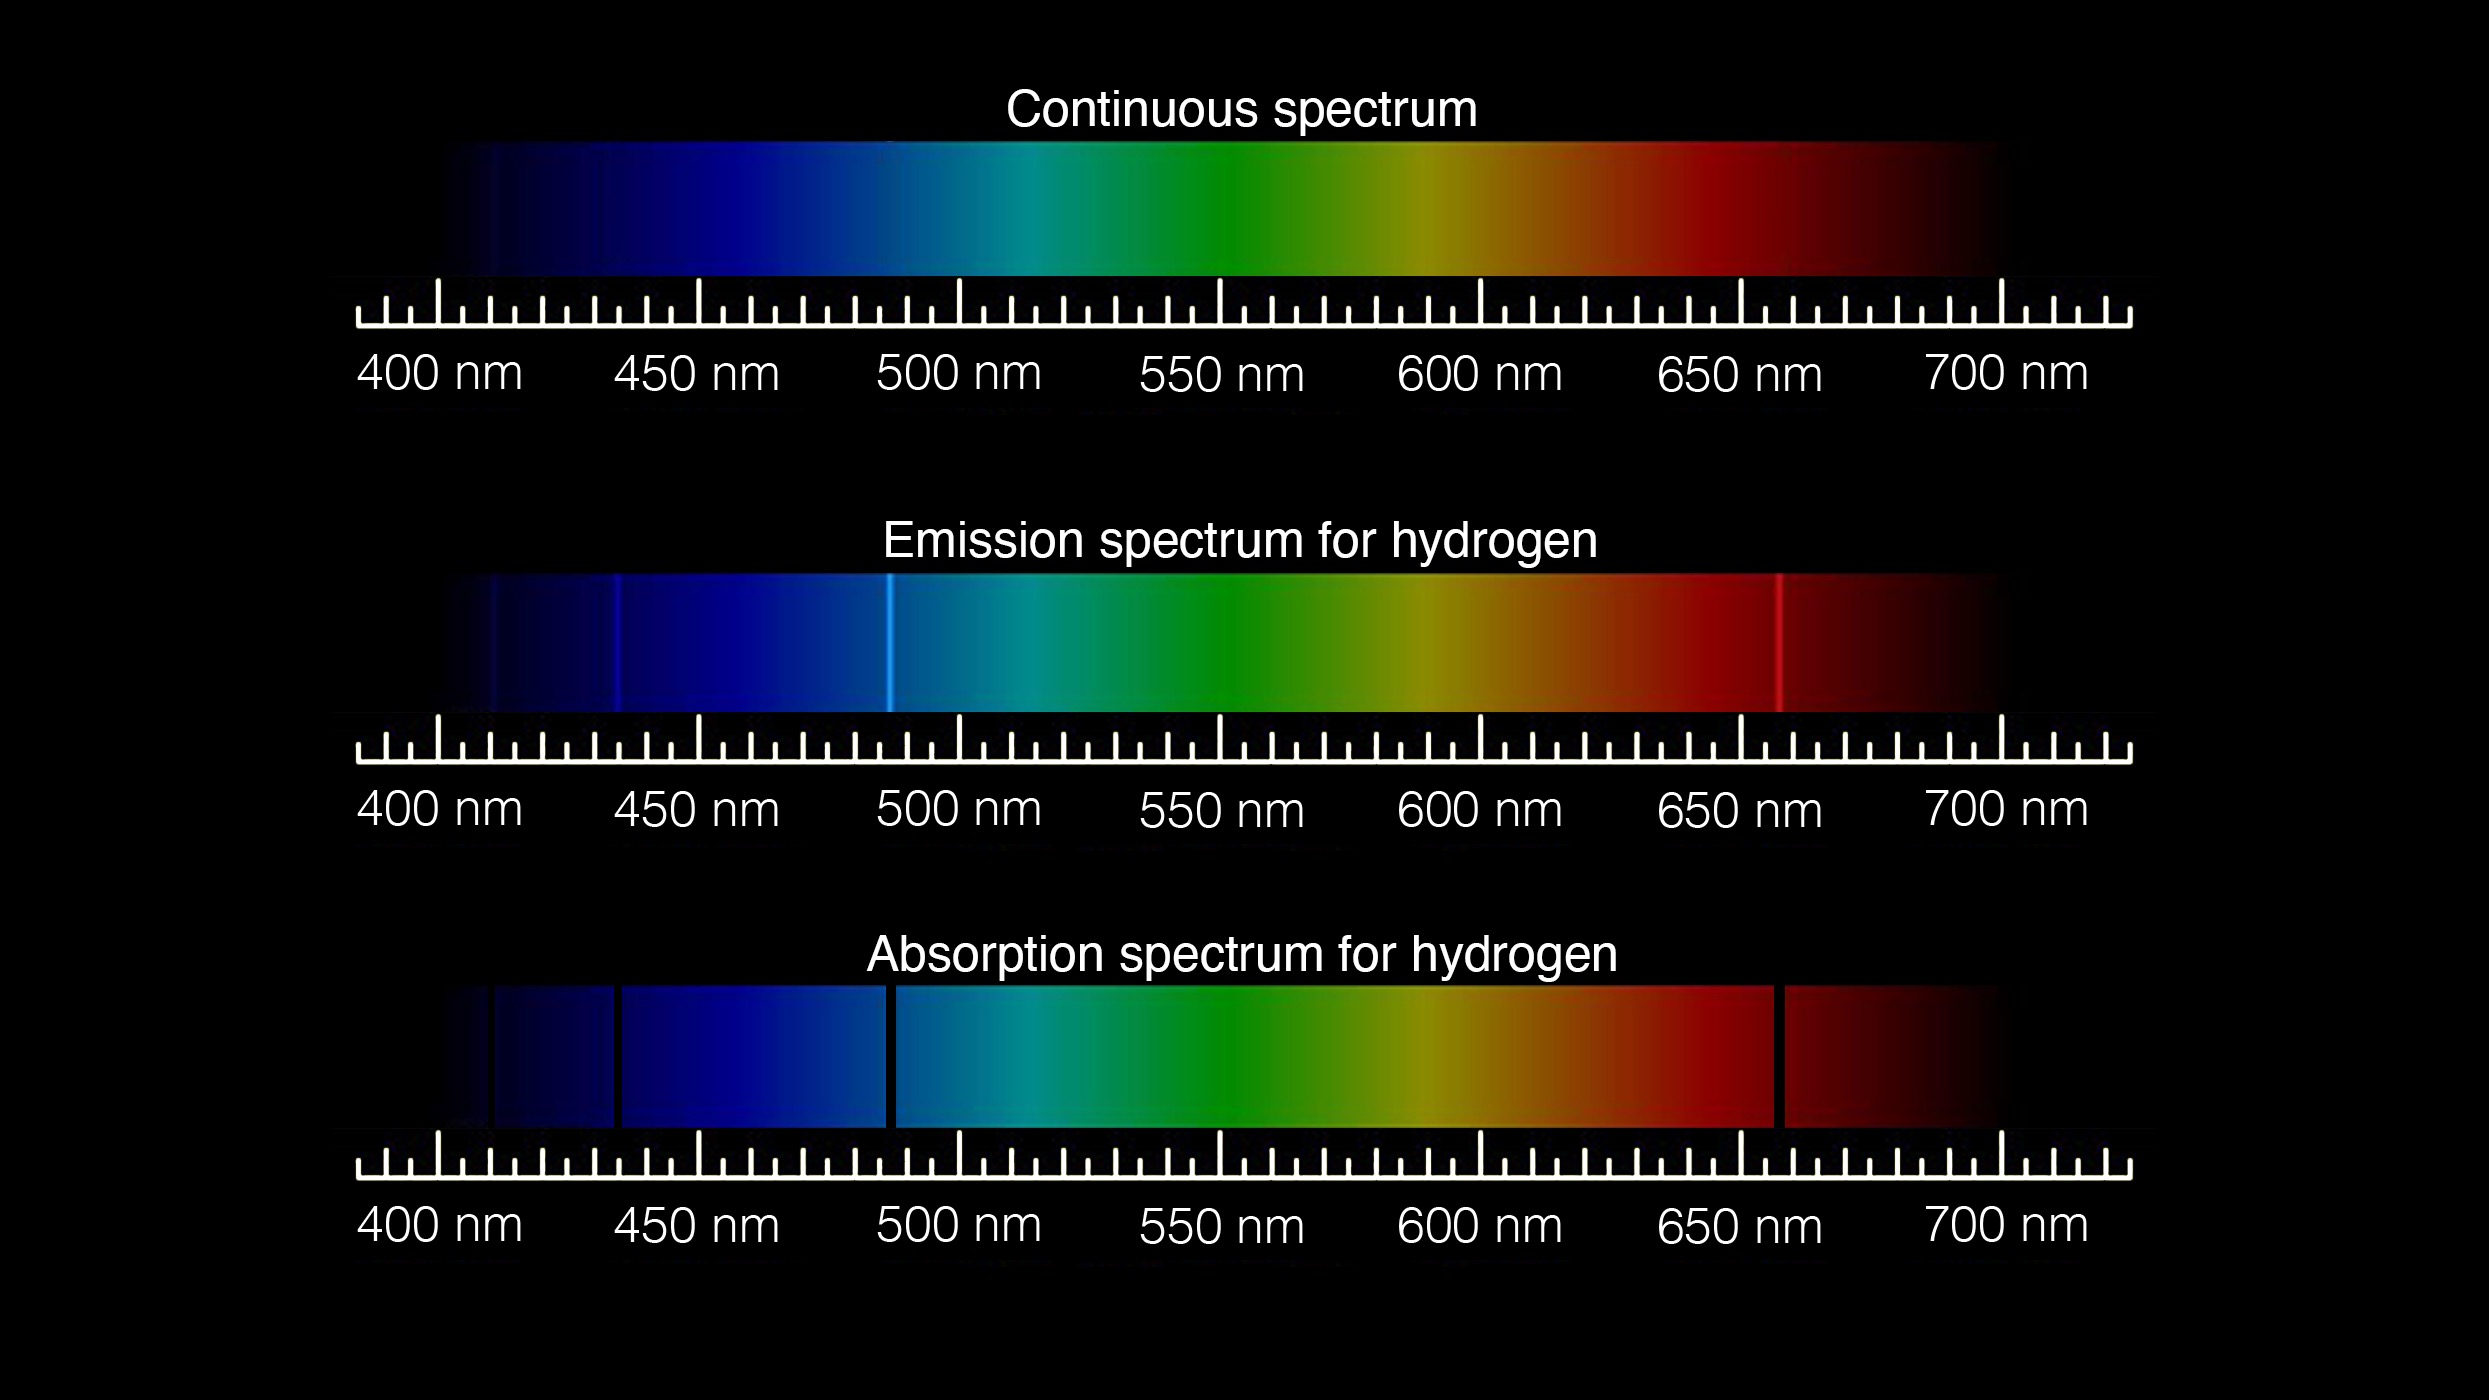

In [6]:
display(Image(filename='hydrogen_spectra.jpeg'))

And here is an actual observed spectrum of the sun, with the "rainbow" digitally added to guide your eye as to the absorption line wavelengths.

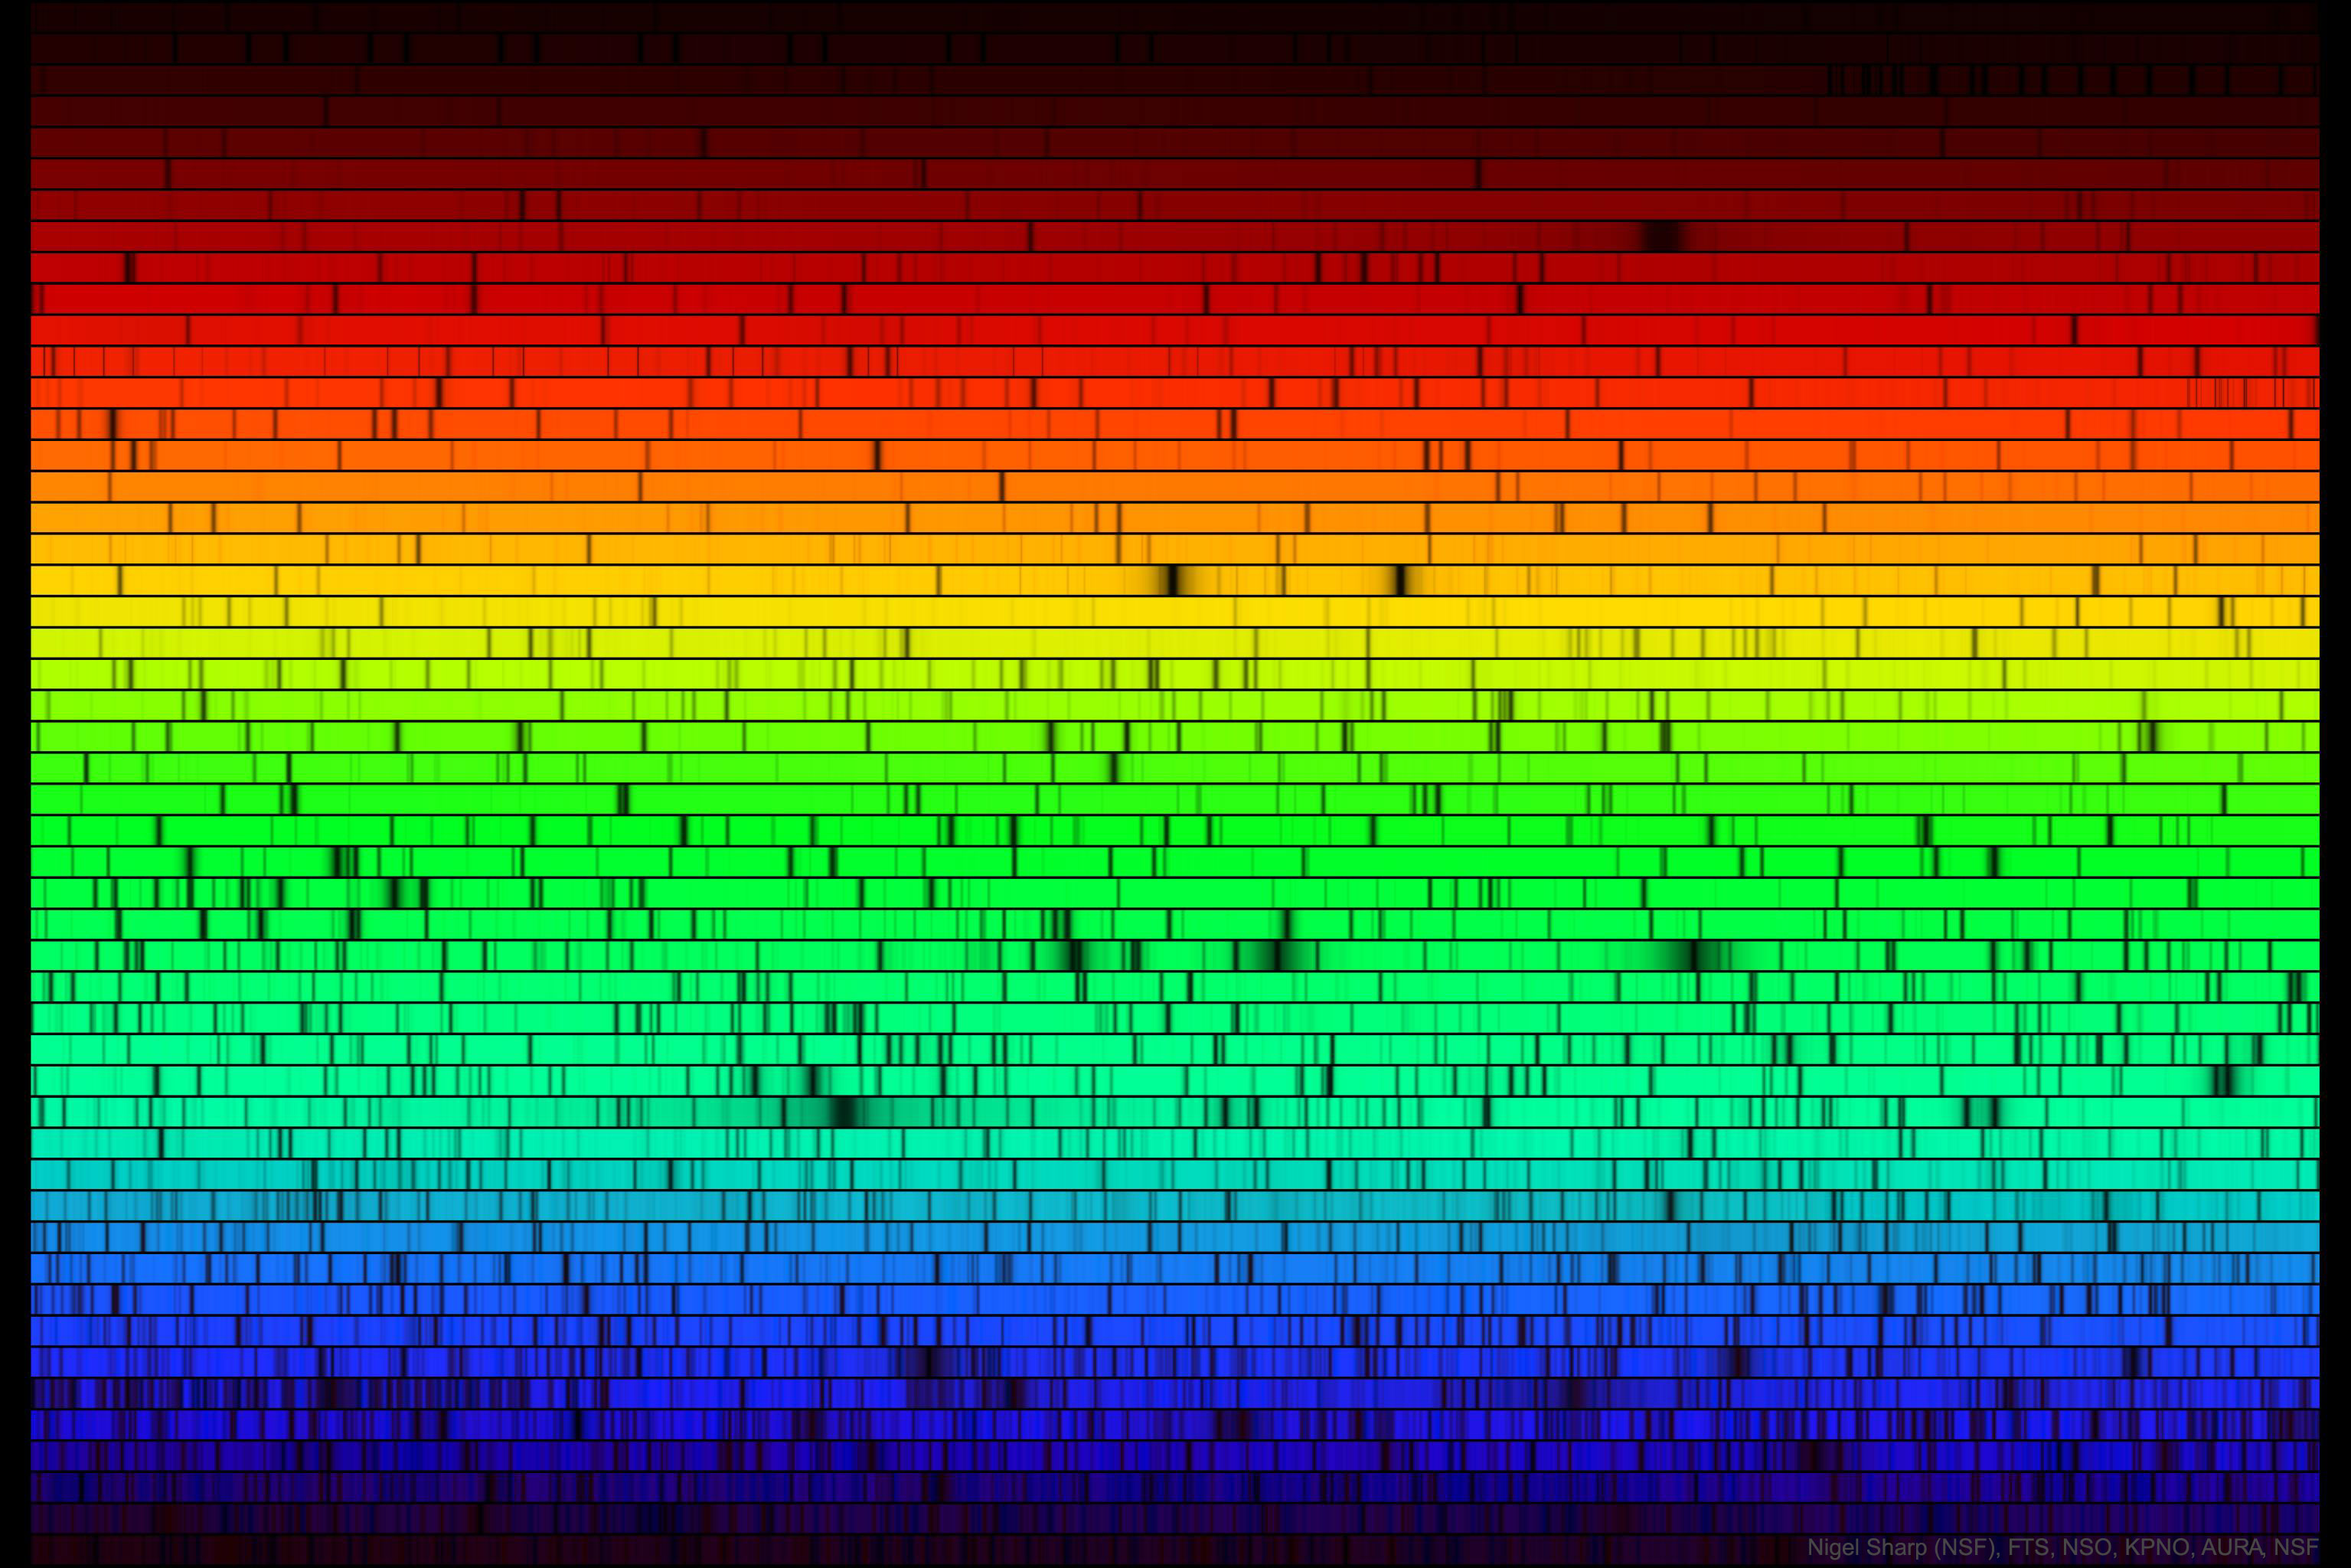

In [7]:
display(Image(filename="sunspectrum_noao_3071.jpeg"))

#### Key point: discrete lines show that the interaction between light and atoms is quantized

In [8]:
constants.Wien

0.002897771955